### Archivo:	G92_GuillermoVelez_Ej2E.ipynb
### Autor: 	Guillermo Velez
### Fecha:	28/10/2020 - 29/10/2020

# Ejercicio 2E: Regresión lineal
---

### Descripcion:

Para el conjunto de datos:

### E:

<HTML>
    <TABLE>
        <TR>
            <TD><B>X</B></TD><TD>0</TD><TD>30</TD><TD>10</TD><TD>15</TD><TD>5</TD><TD>25</TD><TD>35</TD><TD>40</TD>
        </TR>
        <TR>
            <TD><B>Y</B></TD><TD>4</TD><TD>1</TD><TD>2</TD><TD>2</TD><TD>3</TD><TD>1</TD><TD>0</TD><TD>1</TD>
        </TR>
    </TABLE>
</HTML>

realice un programa en Python empleando el Jupyter Notebook que:
- Ajuste los datos a una línea recta empleando el método de los mínimos cuadrados, realizando una descripción teórica detallada.
- Calcule la pendiente y la intersección, así como el error estándar y el coeficiente de correlación.
- Realice una gráfica en donde se muestren los datos originales y la recta que ajusta.
- Haga un análisis de resultados basándose en la teoría y en los resultados obtenidos. Debe incluir referencias a la bibliografía empleada usando las normas APA. Comentarios sin referencias no serán tenidos en cuenta.
- Para cada método haga una descripción teórica (las ecuaciones deberán estar escritas en $LaTeX$) incluyendo referencias bibliográficas empleadas siguiendo las normas APA.
---

## Desarrollo del ejercicio:
### 1. Se pasa el conjunto de datos a listas

In [2]:
import numpy as np
import math as m

x = [0, 30, 10, 15, 5, 25, 35, 40]
y = [4, 1, 2, 2, 3, 1, 0, 1]
n = len(x)
sep="\t"

print("x:", x)
print("y:", y)
print("Cantidad de datos (n):", n)


x: [0, 30, 10, 15, 5, 25, 35, 40]
y: [4, 1, 2, 2, 3, 1, 0, 1]
Cantidad de datos (n): 8


### 2. Las listas de datos no están ordenadas. Se pasan las listas $[x], [y]$ a tuplas $(x, y)$ con la función $zip$ de python, para ordenarlas con luego con respecto a $x$ con el método $sort$ de python, y se devuelven luego como listas ordenadas. (Moracho, 2017)

In [3]:
tuplelist = [e for e in zip(x, y)]
tuplelist.sort(key=lambda tuplelist: tuplelist[0])
xord = []
yord = []
xord, yord = [list(e) for e in zip(*tuplelist)]

print("x:", xord)
print("y:", yord)

x: [0, 5, 10, 15, 25, 30, 35, 40]
y: [4, 3, 2, 2, 1, 1, 0, 1]


### 3. Se crea la función de regresión por mínimos cuadrados, basándose en la codificación propuesta en el material de referencia (Canale, 2007). Posteriormente se evalúa usando los datos del ejercicio.

De acuerdo con la teoría, lo que trata este método es buscar la ecuación de una recta, con la cual la distancia de la nube de puntos dados a ésta recta, sea mínima y de esta manera explicar aproximadamente el comportamiento de los datos (asociados a algún fenómeno). Teniendo en cuenta que la ecuación de una recta (en forma pendiente - intercepto) es  $y = a_0 + a_1 x + e$, donde $a_1$ es la pendiente de la recta, $a_0$ el intercepto y $e$ el error. Despejando $e$, se calculan de la siguiente forma:

<HTML>
    <TABLE border="0">
        <TR>
            <TD>$\sum_{i=1}^n e_i=\sum_{i=1}^n (y_i-a_0-a_1x_i)$,</TD>
            <TD>     </TD>
            <TD>$ a_1=\frac{n\sum x_i y_i-\sum x_i\sum y_i}{n\sum x_i^2-(\sum x_i)^2}$,</TD>
            <TD>     </TD>
            <TD>$a_0=\overline{y}-a_1\overline{x}$</TD>
        </TR>
    </TABLE>
</HTML>

Asociados con el metodo tambien se calculan; error estándar $S_{y/x}=\sqrt{\frac{s_r}{n-2}}$ que cuantifica la dispersión de los datos, la magnitud del error residual $S_t$ asociado con la variable dependiente ($y$) antes de la regresión y el error después de realizar la regresión $S_r$. Ambos sirven para calcular además, el coeficiente de determinación $r^2=\frac{S_t-S_r}{S_t}$ que es la norma de $S_t$ por diferencia de los anteriores $r^2=\frac{S_t-S_r}{S_t}$ que que explica cuanto explica el modelo lineal (regresión) el conjunto de datos dados.


In [4]:
def Regress(x, y, n):
    sumx = 0
    sumxy = 0
    st = 0 
    sumy = 0
    sumx2 = 0
    sr = 0
    
    for i in range(1, n):
        sumx = sumx + x[i] 
        sumy = sumy + y[i] 
        sumxy = sumxy + x[i]*y[i] 
        sumx2 = sumx2 + x[i]*x[i]
    
    xm = sumx / n 
    ym = sumy / n
    a1 = (n * sumxy - sumx * sumy) / (n * sumx2 - sumx * sumx)
    a0 = ym - a1 * xm
    for i in range(1, n):
        st = st + (y[i] - ym) ** 2
        sr = sr + (y[i] - a1 * x[i] - a0) ** 2

    syx = (sr / (n - 2)) ** 0.5
    r2 = (st - sr) / st
    Reg_Lin = [a1, a0, st, sr, syx, r2]
    return Reg_Lin
    
Reg_Lin = Regress(xord, yord, n)

print("pendiente a1:" , Reg_Lin[0], sep, "intercepto a0:" , Reg_Lin[1])
print("error estandar St:" , Reg_Lin[2], sep, "error residual Sr:" , Reg_Lin[3], sep, "error estandar estimado Sy/x:" , Reg_Lin[4])
print("r2:" , Reg_Lin[5])

pendiente a1: -0.02666666666666667 	 intercepto a0: 1.7833333333333332
error estandar St: 5.9375 	 error residual Sr: 3.2530555555555556 	 error estandar estimado Sy/x: 0.7363259644518356
r2: 0.4521169590643275


### De acuerdo con los resultados de la regresión, la ecuación de la recta que representa el modelo lineal de los datos dados es: $ y = 1.783 - 0.027x$ ; y de acuerdo con el coeficiente de correlación $r^2 = 0.45$, se indica que el modelo lineal sólo explica el 45% del comportamiento de los datos...
---

## Gráfica Regresión Lineal del Ejercicio 2E

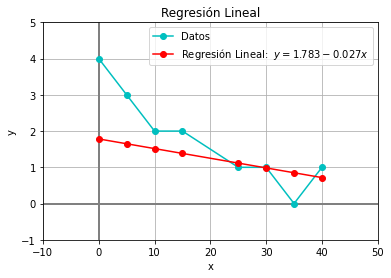

In [5]:
import matplotlib.pyplot as plt

y2=[]
for i in range(0, n):
    y2.append(Reg_Lin[1] + Reg_Lin[0] * xord[i])

plt.title("Regresión Lineal")
plt.xlabel("x")
plt.ylabel("y")
plt.axhline(0, color = "gray", linewidth = 2, linestyle = "solid")
plt.axvline(0, color = "gray", linewidth = 2, linestyle = "solid")
plt.xlim(-10, 50)
plt.ylim(-1, 5)
plt.plot(xord, yord, color="c", label="Datos", marker ="o")
plt.plot(xord, y2, color="r", label="Regresión Lineal:  $y = 1.783 -0.027x$", marker ="o")
plt.legend()
plt.grid()
plt.show()

---
## Análisis de resultados

- De la gráfica, se puede observar que la nube de puntos dados no concuerda mucho con una línea recta (lo que se confirma con el coeficiente de determinación de $r^2 = 0.45$, que solo explica el 45% de los datos), los primeros datos se alejan bastante de la recta hallada en la regresión; o viceversa, si no se tomase en cuenta el último dato (que parece no concordar con la tendencia de los demás) se tendría una recta con una pendiente más pronunciada y la recta encontrada por dicha regresión, tendría menor (distancia) error con respecto a la dispersión de los datos. Otra opción sería, buscar un módelo de regresión para una curva en lugar de una recta.
---

## Referencias

Canale, R. P. y P. Canale, R. (2007). Métodos numéricos para ingenieros (5a. ed.). México D.F, Mexico: McGraw-Hill Interamericana. (pp. 233 – 244, 305 – 317). Tomado de: https://elibro-net.bibliotecavirtual.unad.edu.co/es/lc/unad/titulos/73710

Ferrer, J. (s.f.). Métodos iterativos: Cálculo Numérico. Tomado de: http://venus.ceride.gov.ar/cursos/moodledata/31/moddata/assignment/195/4382/Ferrer_Juan_Ignacio_TP3_Metodos_Iterativos.pdf

Burrueco, D. (s.f.). La función plot estilo OO. Tomado de: https://www.interactivechaos.com/manual/tutorial-de-matplotlib/la-funcion-plot-estilo-oo

Oliphant, T. (2020). Guide to NumPy: NumPy Reference. Tomado de: https://numpy.org/doc/stable/reference/index.html

Moracho, P.(26/07/2017). Ordenar listas en Python 3 dependiendo de otra lista. [Foro] Tomado de: https://es.stackoverflow.com/questions/90784/ordenar-listas-en-python-3-dependiendo-de-otra-lista